In [1]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from pylab import rcParams
import io 

**We used a 1994 Census Bureau dataset downloaded from https://www.kaggle.com/uciml/adult-census-income      This dataset contains just over 32,000 rows each containing 15 columns of descriptive variables.**

### RESEARCH QUESTIONS
1.	Is there a relationship between a person’s level of education and their income level?
2.	Which gender has a higher income level?  
3.	Does a person’s marital status have any correlation to their income level?
4.	What is the age range and average age of the population?
5.	What is the relationship between the hours worked per week and education level? What is the correlation?
6.	What is the relationship between hours worked per week and income level? What is the correlation?
7.	Which occupations work more hours per week?
8.	What is the relationship between a person’s age, hours worked per week and their income level?


In [2]:
#Looking at the summary statistics of the variables, there are several facts that are interesting:

# The average age is 38.58 years (with a standard deviation of 13.64)
# 22,696 people (about 70%) work in the private sector.
# The majority of people (about 85%) in the dataset identify as "White."
# The majority of people (about 67%) in the dataset identify as "Male."
# The average working hour per week is 40.437 hours which typical.

In [3]:
# loading the csv file
source_data = pd.read_csv("adult.csv")
# Check the type of our features
source_data.dtypes
# create new dataframe that exclude the capital.loss
result = source_data

del result["capital.loss"]

#show some descriptive stats of the dataset 
result.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,45.000000,NaN,NaN


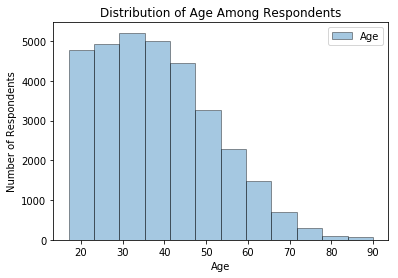

In [4]:
"Create a histogram that shows the distribution of age among respondents."
age = result['age']
plt.hist(age, alpha=.40, label='Age', bins=12, ec="k")
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Age Among Respondents')

# Add legend
plt.legend()

# Show the figure - Age distibutoion is skewed to the right
plt.show()

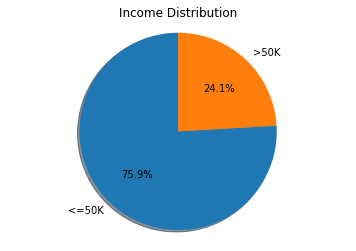

In [5]:
income_group = result['income'].value_counts()
# create a pie chart to show the percentage of respondents falling into which income groups
labels = '<=50K', '>50K'

fig1, ax1 = plt.subplots()
ax1.pie(income_group, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Income Distribution")
# Income level in our dataset show 75.9% earn less than $50,000 per yr
plt.show()

In [6]:
#define a function that reads in the data in the same way everytime. If you need to transform it from that point you can do so...
#...in your specific function. This function provides a clean slate of the data
def read_data():
    df = pd.read_csv('adult.csv')
    df = df.rename(columns={'income':'income_over_50K'}).replace({'<=50K':0,'>50K':1})
    df['education1'] = df['education'].replace({'10th':10,'11th':11,'12th':12,'HS-grad':12,'7th-8th':8,'Bachelors':16,'Masters':18,'Doctorate':20,'9th':9,'5th-6th':6,'1st-4th':4,'Preschool':0,'Assoc-acdm':14,'Assoc-voc':14,'Prof-school':13,'Some-college':12.5})
    df['age']=df['age'].astype(str)
    df['capital.gain'].astype(str)
    df['capital.loss'].astype(str)
    return df

read_data().head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income_over_50K,education1
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0,12.0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,12.0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0,12.5


In [7]:
#this function uses boolean masking to return a subset of the original data based on parameters you give it. 
#one of the arguements you need to pass is a dataframe it self. This increases re-usability of the function if you were to...
#...apply this function to any dataframe 

def filter_dataframe(df,column_name,value):
    return df[df['{}'.format(column_name)]==value]

filter_dataframe(read_data(),'education','HS-grad').head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income_over_50K,education1
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0,12.0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,12.0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0,12.0


In [8]:
#a function specific to our dataframe because the column labels are hard coded
def get_income_percent(df):
    return (sum(df.income_over_50K)/len(df.income_over_50K))

get_income_percent(filter_dataframe(read_data(),'education','HS-grad'))

0.15950861822683554

In [9]:
#a function that calls the three functions defined above. This can be applied to any categorical column

def get_filter(column_name,arg):
    df = read_data()
    df1 = filter_dataframe(df,column_name,arg)
    return str('the percent of people who make over 50K a year classified as {} type {} is'.format(column_name,arg) + ' ' + str(round(100*get_income_percent(df1),2)) + '%')

get_filter('education','HS-grad')

'the percent of people who make over 50K a year classified as education type HS-grad is 15.95%'

In [10]:
#the reason you do that is so you can do the calculations in a more reproducible way. 
#because of this structure you can loop through each label in a specific value in categorical column
for i in read_data().race.unique():
    print(get_filter('race',i))
    
print(' ')

for i in read_data().education.unique():
    print(get_filter('education',i))

the percent of people who make over 50K a year classified as race type White is 25.59%
the percent of people who make over 50K a year classified as race type Black is 12.39%
the percent of people who make over 50K a year classified as race type Asian-Pac-Islander is 26.56%
the percent of people who make over 50K a year classified as race type Other is 9.23%
the percent of people who make over 50K a year classified as race type Amer-Indian-Eskimo is 11.58%
 
the percent of people who make over 50K a year classified as education type HS-grad is 15.95%
the percent of people who make over 50K a year classified as education type Some-college is 19.02%
the percent of people who make over 50K a year classified as education type 7th-8th is 6.19%
the percent of people who make over 50K a year classified as education type 10th is 6.65%
the percent of people who make over 50K a year classified as education type Doctorate is 74.09%
the percent of people who make over 50K a year classified as educa

In [11]:
#This functionn uses the functions we defined above, to return the data in a way that's easier to work with / graph
def get_correlation(category):
    df = read_data()
    unique_types = df['{}'.format(category)].unique()
    education_dict = {}
    for level in unique_types:
        education_dict.update({level:round(100*get_income_percent(filter_dataframe(df,'{}'.format(category),'{}'.format(level))),2)})
    return education_dict

get_correlation('education')

{'10th': 6.65,
 '11th': 5.11,
 '12th': 7.62,
 '1st-4th': 3.57,
 '5th-6th': 4.8,
 '7th-8th': 6.19,
 '9th': 5.25,
 'Assoc-acdm': 24.84,
 'Assoc-voc': 26.12,
 'Bachelors': 41.48,
 'Doctorate': 74.09,
 'HS-grad': 15.95,
 'Masters': 55.66,
 'Preschool': 0.0,
 'Prof-school': 73.44,
 'Some-college': 19.02}

In [12]:
#This function uses the other functions to allow you to build either a line or a bar graph based on any categorical variable
def build_plot(column_name,line):
    import matplotlib.pyplot as plt
    plt.close()
    img = io.BytesIO()
    import base64
    test = pd.DataFrame(columns=['var'])
    df1 = pd.DataFrame([get_correlation(column_name).values()], columns=list(get_correlation(column_name).keys()))
    df2 = df1.T.rename(columns={0: 'var'}).sort_values('var')
    names = df2.index
    counts = list(df2['var'])
    pylab.figure(1)
    x = range(len(df2['var']))
    pylab.xticks(x, names, rotation=70)
    pylab.ylabel('% of ppl making over 50K',fontsize=14)
    pylab.xticks(fontsize='x-large')
    pylab.yticks(fontsize='x-large')
    if line  == 'line':
        pylab.plot(x, counts, "g")
    elif line  == 'bar':
        plt.bar(x,counts)
    plt.title('{} vs income'.format(column_name))
    plt.rcParams["figure.figsize"] = [8,8]
    plt.tight_layout()
    return plt.show()

In [13]:
#build_plot('sex','bar')
#build_plot('race','bar')
#build_plot('education','bar')
#build_plot('workclass','bar')
#build_plot('occupation','bar')
#build_plot('marital.status','bar')
#build_plot('age','bar')

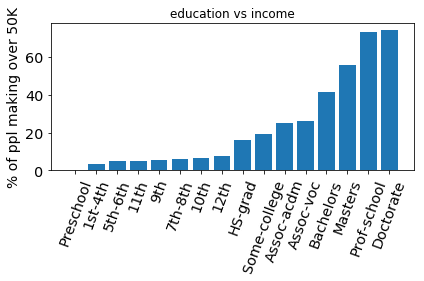

In [14]:
build_plot('education','bar')

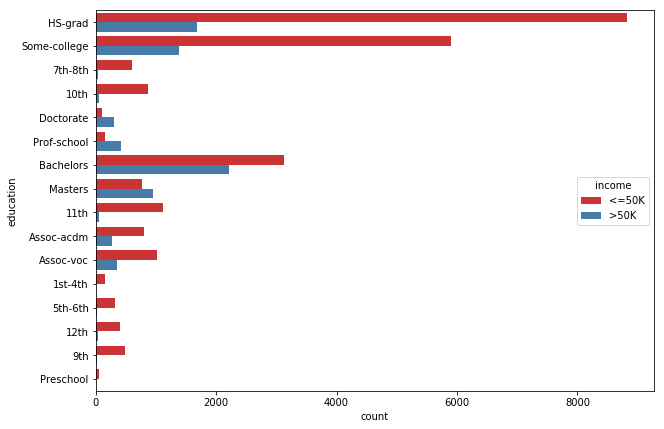

In [15]:
#create a function that makes a horizontal barchart 
def create_bar_chart(variable1,variable2):
    plt.figure(figsize=(10,7))
    ax = sns.countplot(y=variable1, hue=variable2, data=result,palette='Set1')
    
# create a bar chart to check the connection between income and education
education = result['education']
income = result['income']
create_bar_chart(education,income)

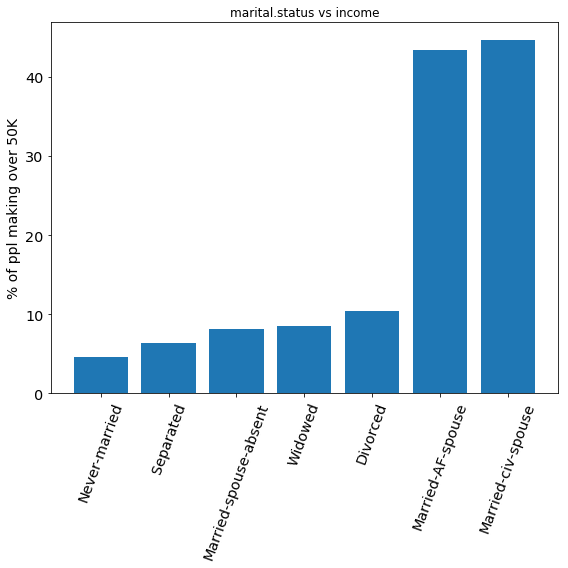

In [16]:
build_plot('marital.status','bar')

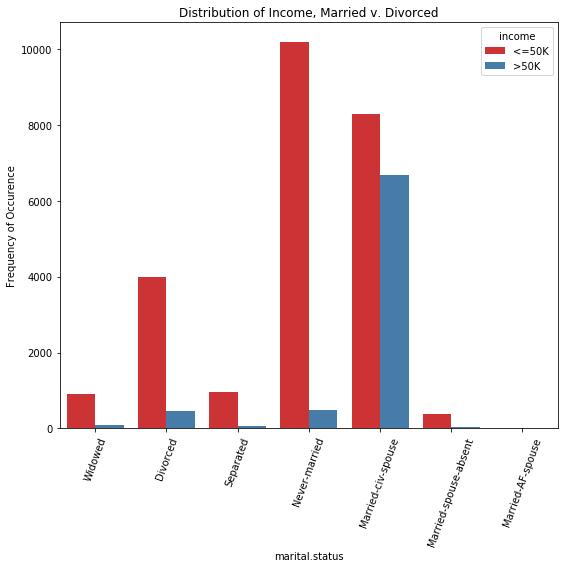

In [17]:
# Create a bar chart that shows the distribution of income among married, divorced, widowed individuals
result.describe(include = 'all')
ax = sns.countplot(x=result['marital.status'], hue=result['income'], data=result, palette='Set1')
plt.xlabel('marital.status')
plt.ylabel('Frequency of Occurence')
plt.title('Distribution of Income, Married v. Divorced')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

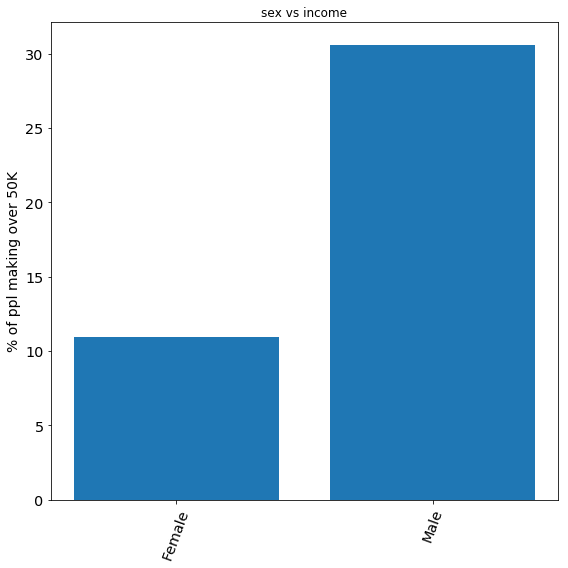

In [18]:
build_plot('sex','bar')

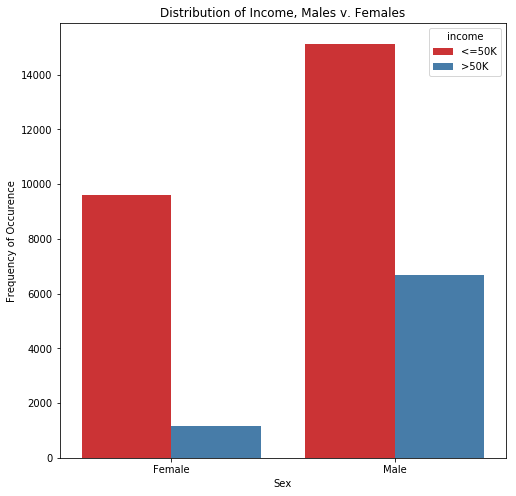

In [19]:
# Create a bar chart that shows the distribution of income among females and males
result.describe(include = 'all')
ax = sns.countplot(x=result['sex'], hue=result['income'], data=result, palette='Set1')
plt.xlabel('Sex')
plt.ylabel('Frequency of Occurence')
plt.title('Distribution of Income, Males v. Females')
plt.show()
# Looking at the chart, we see clearly that males earn more than females in our dataset.

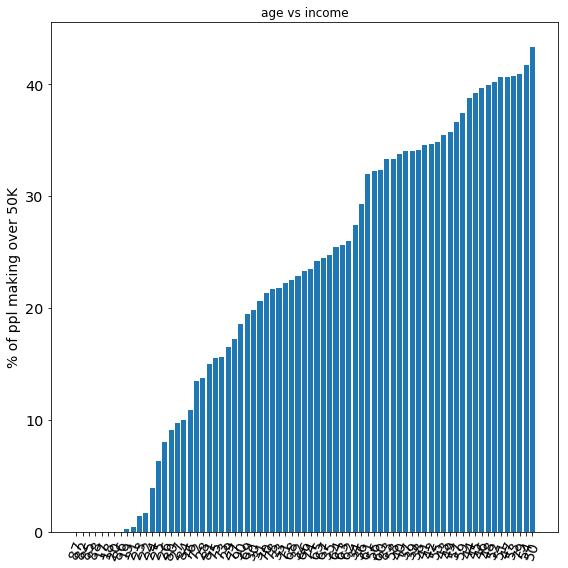

In [20]:
build_plot('age','bar')

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


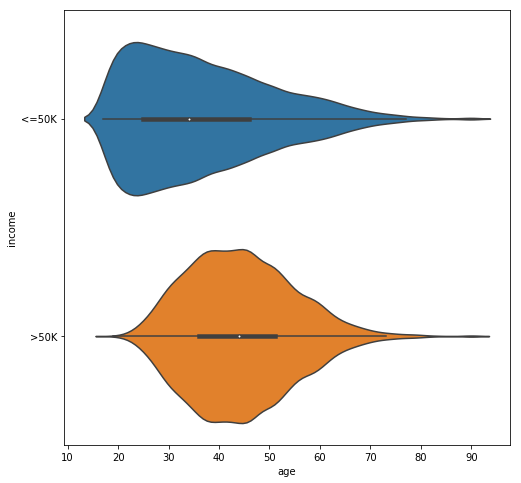

In [25]:
#Look at the relationship between income and age
raw_data=pd.read_csv('adult.csv',header=0)
sns.violinplot(y='income',x='age',data=raw_data)
plt.show()

In [26]:
print('Age of people who make 50K or under annually:\n',raw_data['age'][(raw_data['income'] == '<=50K')].describe(),'\n\nAge of people who make over 50K annually:\n',raw_data['age'][(raw_data['income'] == '>50K')].describe())


Age of people who make 50K or under annually:
 count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64 

Age of people who make over 50K annually:
 count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64


C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


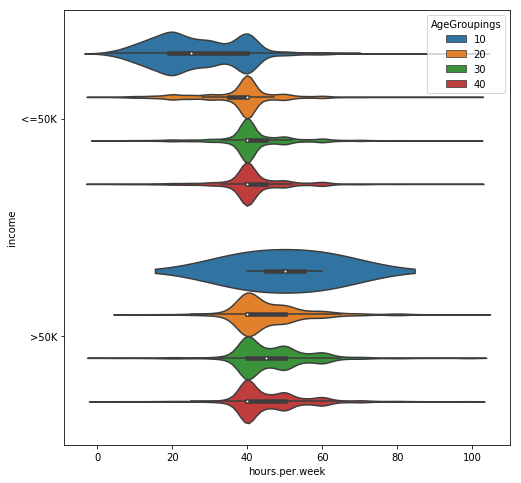

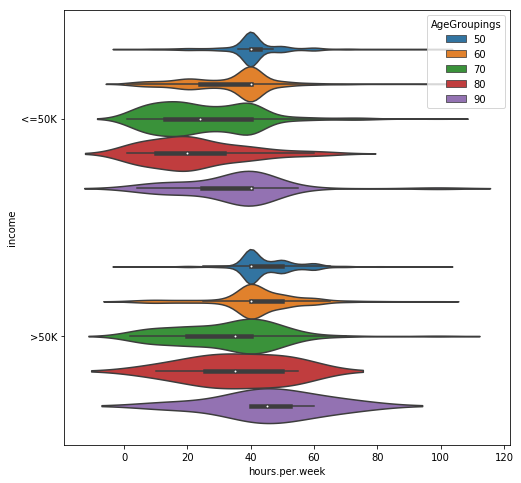

In [29]:
raw_data['AgeGroupings']=raw_data['age'].astype(str).str[:-1]+'0'
sns.violinplot(y='income',x='hours.per.week',data=raw_data[(raw_data['AgeGroupings'] < '50')],scale='width',hue='AgeGroupings')
plt.show()
sns.violinplot(y='income',x='hours.per.week',data=raw_data[(raw_data['AgeGroupings'] >= '50')],scale='width',hue='AgeGroupings')